Ameer Syamil bin Mohd Sahabudin 1816347

1) By using google colab code to access your webcam, capture three different
facial expressions of yourself. 


1.   Apply both Canny Edge Detection and Sobel Edge Detection to only the face area of the image using a suitable threshold values. (5 Marks)
2.   Perform blurring of only faces in those images. (5 Marks)
1.   Calculating the number of coins in an image using contours. (5 Marks) (will be continue in part2 file)

In [2]:
path = "/content/drive/MyDrive/KPTPACE-DLCV-Workshop.gitfront/my work/"

In [1]:
#import all
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [75]:
def take_photo(filename=path+'photo_TEST.jpg', quality=1):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data) 
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  plt.imshow(gray)
  # save image
  cv2.imwrite(filename, img)
  #print(img)
  return filename

<IPython.core.display.Javascript object>

Saved to /content/drive/MyDrive/KPTPACE-DLCV-Workshop.gitfront/my work/photo.jpg


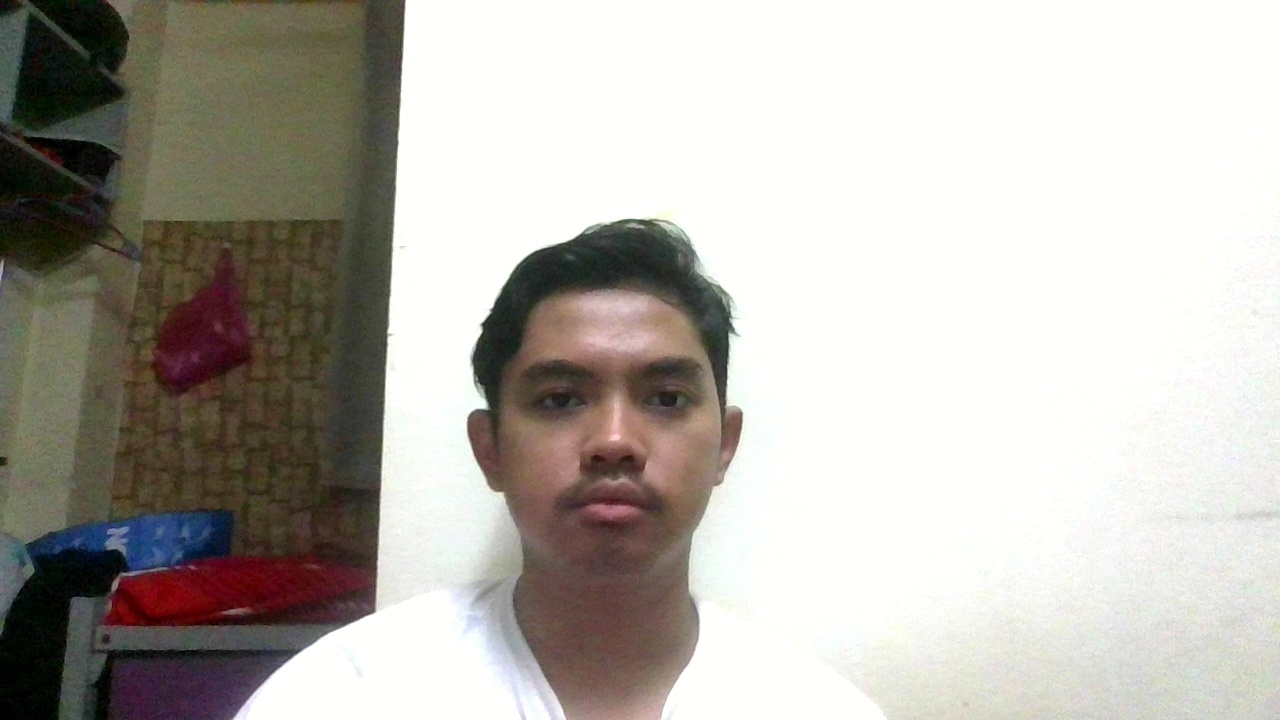

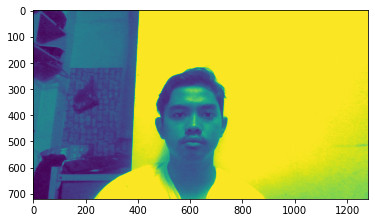

In [158]:
try:
  filename = take_photo(path+'photo.jpg')
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

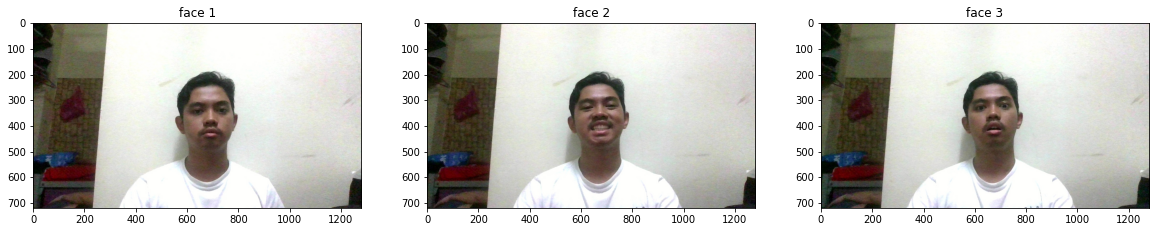

In [153]:
img1 = cv2.imread(path+"photo1.jpg")
img2 = cv2.imread(path+"photo2.jpg")
img3 = cv2.imread(path+"photo3.jpg")

imgrgb1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
imgrgb2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
imgrgb3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

plt.figure(figsize=[20,20])
plt.subplot(131);plt.imshow(imgrgb1);plt.title("face 1")
plt.subplot(132);plt.imshow(imgrgb2);plt.title("face 2")
plt.subplot(133);plt.imshow(imgrgb3);plt.title("face 3")
plt.show()


Text(0.5, 1.0, 'face 3 blurred')

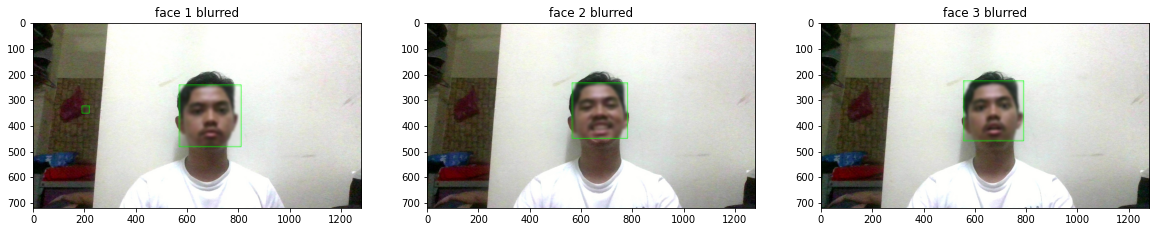

In [163]:
gray1 = cv2.cvtColor(imgrgb1, cv2.COLOR_RGB2GRAY)
faces = face_cascade.detectMultiScale(gray1)
img_copy1 = imgrgb1.copy()
img_blur1 = imgrgb1.copy()
img_sobel1 = imgrgb1.copy()
for (x,y,w,h) in faces:
      img_blur1 = cv2.rectangle(img_blur1,(x,y),(x+w,y+h),(0,255,0),2)
      imgrgb1_convolute = cv2.GaussianBlur(img_blur1[y:y+h,x:x+w], (15,15),5)
      img_blur1[y:y+h,x:x+w] = imgrgb1_convolute
      imgCanny1 = cv2.Canny(imgrgb1_convolute,35,35)
      imgCanny1 = imgCanny1.reshape((imgCanny1.shape[0], imgCanny1.shape[1], 1))
      img_copy1[y:y+h,x:x+w] = imgCanny1
      sobelx = cv2.Sobel(imgrgb1_convolute, cv2.CV_8U,1,0,ksize=3)
      sobely = cv2.Sobel(imgrgb1_convolute, cv2.CV_8U,0,1,ksize=3)
      imgSobel1 = sobelx + sobely
      img_sobel1[y:y+h,x:x+w] = imgSobel1

gray2 = cv2.cvtColor(imgrgb2, cv2.COLOR_RGB2GRAY)
faces = face_cascade.detectMultiScale(gray2)
img_copy2 = imgrgb2.copy()
img_blur2 = imgrgb2.copy()
img_sobel2 = imgrgb2.copy()
for (x,y,w,h) in faces:
      img_blur2 = cv2.rectangle(img_blur2,(x,y),(x+w,y+h),(0,255,0),2)
      imgrgb2_convolute = cv2.GaussianBlur(img_blur2[y:y+h,x:x+w], (15,15),5)
      img_blur2[y:y+h,x:x+w] = imgrgb2_convolute
      imgCanny2 = cv2.Canny(imgrgb2_convolute,35,35)
      imgCanny2 = imgCanny2.reshape((imgCanny2.shape[0], imgCanny2.shape[1], 1))
      img_copy2[y:y+h,x:x+w] = imgCanny2
      sobelx = cv2.Sobel(imgrgb2_convolute, cv2.CV_8U,1,0,ksize=3)
      sobely = cv2.Sobel(imgrgb2_convolute, cv2.CV_8U,0,1,ksize=3)
      imgSobel2 = sobelx + sobely
      img_sobel2[y:y+h,x:x+w] = imgSobel2

gray3 = cv2.cvtColor(imgrgb3, cv2.COLOR_RGB2GRAY)
faces = face_cascade.detectMultiScale(gray3)
img_copy3 = imgrgb3.copy()
img_blur3 = imgrgb3.copy()
img_sobel3 = imgrgb3.copy()
for (x,y,w,h) in faces:
      img_blur3 = cv2.rectangle(img_blur3,(x,y),(x+w,y+h),(0,255,0),2)
      imgrgb3_convolute = cv2.GaussianBlur(img_blur3[y:y+h,x:x+w], (15,15),5)
      img_blur3[y:y+h,x:x+w] = imgrgb3_convolute
      imgCanny3 = cv2.Canny(imgrgb3_convolute,35,35)
      imgCanny3 = imgCanny3.reshape((imgCanny3.shape[0], imgCanny3.shape[1], 1))
      img_copy3[y:y+h,x:x+w] = imgCanny3
      sobelx = cv2.Sobel(imgrgb3_convolute, cv2.CV_8U,1,0,ksize=3)
      sobely = cv2.Sobel(imgrgb3_convolute, cv2.CV_8U,0,1,ksize=3)
      imgSobel3 = sobelx + sobely
      img_sobel3[y:y+h,x:x+w] = imgSobel3

plt.figure(figsize=[20,20])
plt.subplot(131);plt.imshow(img_blur1);plt.title("face 1 blurred")
plt.subplot(132);plt.imshow(img_blur2);plt.title("face 2 blurred")
plt.subplot(133);plt.imshow(img_blur3);plt.title("face 3 blurred")
# plt.subplot(132);plt.imshow(img_sobel1);plt.title("face 1 sobel")


# plt.subplot(122);plt.imshow(imgrgb1_convolute)

Text(0.5, 1.0, 'face 1 canny')

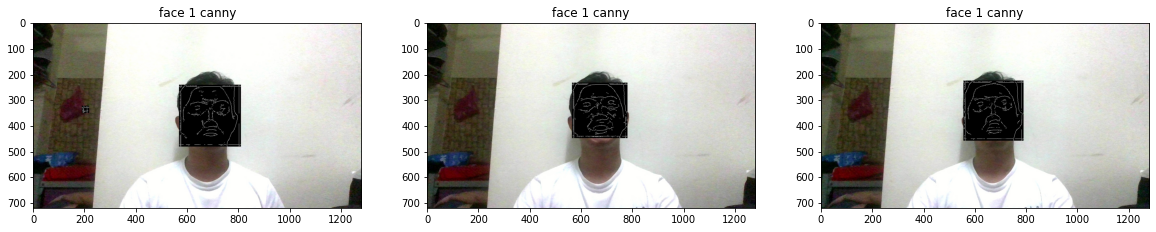

In [156]:
plt.figure(figsize=[20,20])
plt.subplot(131);plt.imshow(img_copy1);plt.title("face 1 canny")
plt.subplot(132);plt.imshow(img_copy2);plt.title("face 2 canny")
plt.subplot(133);plt.imshow(img_copy3);plt.title("face 3 canny")

Text(0.5, 1.0, 'face 3 sobel')

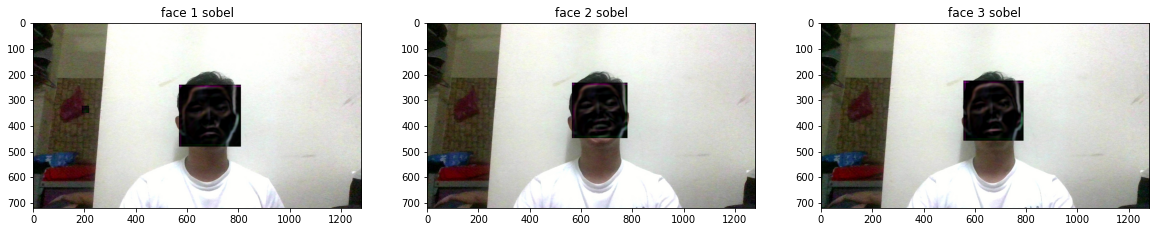

In [165]:
plt.figure(figsize=[20,20])
plt.subplot(131);plt.imshow(img_sobel1);plt.title("face 1 sobel")
plt.subplot(132);plt.imshow(img_sobel2);plt.title("face 2 sobel")
plt.subplot(133);plt.imshow(img_sobel3);plt.title("face 3 sobel")
